In [31]:
import os
import json
import chromedriver_autoinstaller
import selenium
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

In [122]:
# 드라이버

gui = False

# Chrome 웹드라이버 설정
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')  # To maintain user cookies
chrome_options.add_argument('--disable-dev-shm-usage')

if gui :
    chrome_options.add_argument('--headless')  # Headless 모드 (GUI 없이 실행)

chromedriver_path = Service(chromedriver_autoinstaller.install())
driver = webdriver.Chrome(service = chromedriver_path, options = chrome_options)

# Chrome 브라우저의 버전 정보 가져오기
browser_version = driver.capabilities['browserVersion']
chromedriver_version = driver.capabilities['chrome']['chromedriverVersion'].split(' ')[0]

# 버전 출력
print(f'현재 Chrome 브라우저 버전: {browser_version}')
print(f'현재 ChromeDriver 버전: {chromedriver_version}')

if browser_version.split('.')[0] != chromedriver_version.split('.')[0] :
    print('버전이 다릅니다.')

현재 Chrome 브라우저 버전: 130.0.6723.59
현재 ChromeDriver 버전: 130.0.6723.58


In [123]:
# topic 입력받을 txt 파일 

google = True
naver = True

file_name = 'topic.txt'
topics = 'hand, face'

# def find_lines_save_words(file_name, key_line, key_word)

with open(file_name, 'w') as f :
    current_dir = os.getcwd()
    file_path = current_dir.replace('\\', '/')

    for num_topic in range(len(topics.split(','))) :
        f.write(topics.split(',')[num_topic])

In [124]:
# txt 파일 확인

try :
    
    with open(file_name, 'r', encoding = 'utf-8') as f :
        read_data = f.read()
        print(read_data)
    
except FileNotFoundError :
    print(f'{file_path}에 해당 파일을 찾을 수 없습니다.')
    
except Exception as e :
    print(f'오류 발생 : {e}')

hand face


In [103]:
# 구글 

if google :
    driver.get(f'https://www.google.com/search?q={read_data.split(" ")[0]}&tbm=isch')

In [ ]:
# 네이버

if naver :
    driver.get(f'https://search.naver.com/search.naver?&where=image&query={request_data["select_topic"]}')

In [120]:
# topic_select = 

def get_scroll() :
    pos = driver.execute_script("return window.pageYOffset;")
    
    return pos

def scroll_down() :
    last_pos = 0
    pause_cnt = 0
    max_pause_cnt = 20
    
    while True :
        driver.execute_script("window.scrollBy({top : window.innerHeight * 2, behavior : 'smooth'})")
        time.sleep(0.5)
        
        new_pos = get_scroll()
        current_pos = driver.execute_script('return document.body.scrollHeight')
        
        if last_pos == new_pos :
            pause_cnt += 1
            
        else :
            pause_cnt = 0
            last_pos = new_pos    
        
        if pause_cnt >= max_pause_cnt :
            break
        
        
# scroll_down()

416 

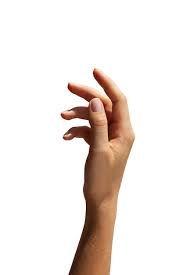

In [125]:
# img src 링크

topic = read_data.split(" ")[0]

def goole_img_link(topic, option = '') :
    
    if google :
        driver.get(f'https://www.google.com/search?q={topic}&tbm=isch{option}')
    
    scroll_down()
    
    img_xpath = '//div[@jsname="dTDiAc"]/div[@jsname="qQjpJ"]//img'
    imgs = driver.find_elements(By.XPATH, img_xpath)

    links = []

    for idx, src in enumerate(imgs) :

        try :
            src = src.get_attribute('src')
            links.append(src)

        except Exception as e :
            print(f'에러발생 {e}')
            
    return links

goole_img_link(topic)
        
print(len(links), links[0])

In [126]:
driver.quit()